In [85]:
import pandas as pd

police2electoral = {'Antrim & Newtownabbey': 'Antrim and Newtownabbey',
                    'Ards & North Down': 'North Down and Ards',
                    'Armagh City Banbridge & Craigavon': 'Armagh, Banbridge and Craigavon',
                    'Belfast City': 'Belfast',
                    'Causeway Coast & Glens': 'Causeway Coast and Glens',
                    'Derry City & Strabane': 'Derry and Strabane',
                    'Fermanagh & Omagh': 'Fermanagh and Omagh',
                    'Lisburn & Castlereagh City': 'Lisburn and Castlereagh',
                    'Mid & East Antrim': 'Mid and East Antrim',
                    'Mid Ulster': 'Mid Ulster',
                    'Newry Mourne & Down': 'Newry, Mourne and Down'}

asb_df = pd.read_csv('anti-social-behaviour-monthly-data.csv', parse_dates={'datetime': ['Calendar_Year', 'Month']})
asb_df.set_index('datetime', inplace=True)

for police, electoral in police2electoral.items():
    asb_df['Policing_District'] = asb_df['Policing_District'].replace(police, electoral)

asb_df = asb_df[asb_df.index > pd.to_datetime('2018')]
asb_df = asb_df[asb_df['Policing_District'] != 'No Policing District Assigned']
asb_df = asb_df[asb_df['Policing_District'] != 'Northern Ireland']

election_df = pd.read_csv('Northern Ireland Council Election Results - DataCSV.csv')
election_df = election_df[election_df['DataCategory'] != '2014 Votes']
election_df = election_df.drop(['DEA', 'Elected', 'Name', 'Party', 'DataCategory'], axis=1)

party_list = ['AP', 'Aontú', 'Conservatives', 'DUP', 'GP', 'Independent', 'Independent Nationalist',
              'Independent Unionist', 'Other', 'Other Socialist', 'PBP', 'PUP', 'SDLP',
              'SF', 'TUV', 'UKIP', 'UUP', 'Workers\' Party']

police = asb_df.groupby('Policing_District')['Incident_Count'].sum()

grouped = election_df.groupby(['Council', 'PartyGrouped'])['FirstPrefs'].sum()
parties = grouped.unstack().fillna(0)
parties['Most votes'] = parties.idxmax(axis=1)
parties['Total votes'] = parties.sum(axis=1)
print(parties.head())

party_asb = parties
party_asb['anti-social'] = police

party_asb['anti2vote'] = party_asb['anti-social'] / party_asb['Total votes'] * 100

# print(party_asb.sort_values('anti2vote', ascending=False).drop(party_list, axis=1))


PartyGrouped                          AP   Aontú  Conservatives      DUP  \
Council                                                                    
Antrim and Newtownabbey           8970.0     0.0            0.0  15100.0   
Armagh, Banbridge and Craigavon   6111.0  1052.0            0.0  21840.0   
Belfast                          17683.0  1420.0            0.0  24317.0   
Causeway Coast and Glens          4058.0   992.0          112.0  15371.0   
Derry and Strabane                2852.0  1032.0            0.0   8923.0   

PartyGrouped                         GP  Independent  Independent Nationalist  \
Council                                                                         
Antrim and Newtownabbey           341.0       2205.0                      0.0   
Armagh, Banbridge and Craigavon     0.0        269.0                      0.0   
Belfast                          6785.0       1456.0                    609.0   
Causeway Coast and Glens          331.0       2039.0          

PartyGrouped                          AP      DUP  Independent     SDLP  \
Council                                                                   
Antrim and Newtownabbey           8970.0  15100.0       2205.0   3742.0   
Armagh, Banbridge and Craigavon   6111.0  21840.0        269.0  10513.0   
Belfast                          17683.0  24317.0       1456.0  10225.0   
Causeway Coast and Glens          4058.0  15371.0       2039.0   4686.0   
Derry and Strabane                2852.0   8923.0       4321.0  15458.0   

PartyGrouped                          SF      UUP Most votes  anti-social  
Council                                                                    
Antrim and Newtownabbey           6269.0   9726.0        DUP         3069  
Armagh, Banbridge and Craigavon  17154.0  16881.0        DUP         5665  
Belfast                          31771.0   6987.0         SF        15832  
Causeway Coast and Glens         11221.0   7725.0        DUP         3215  
Derry and Strabane

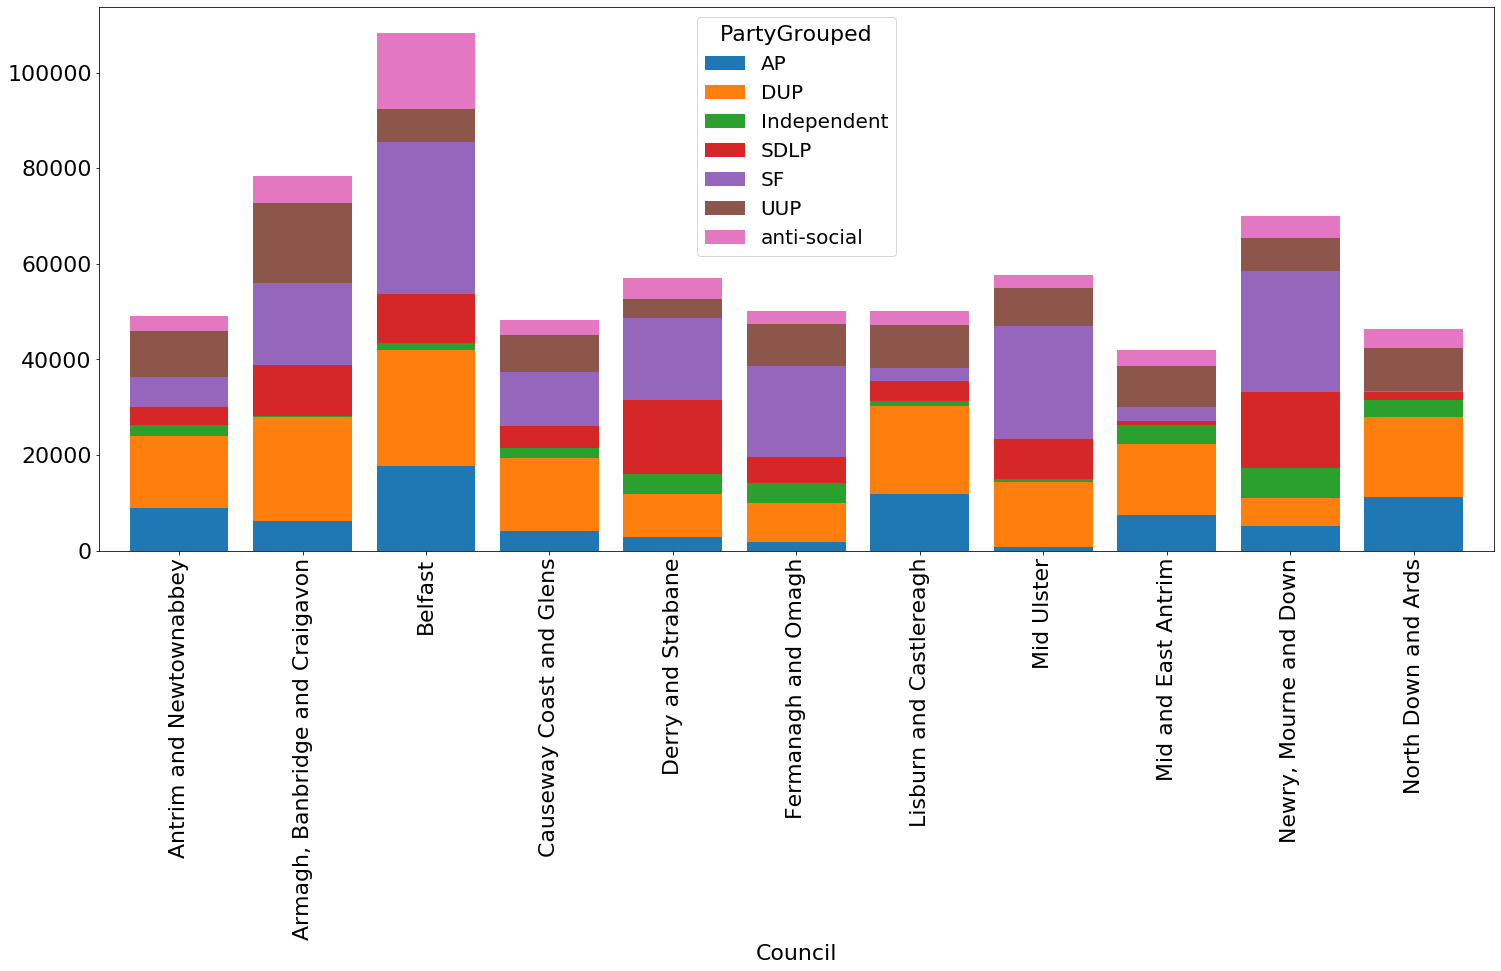

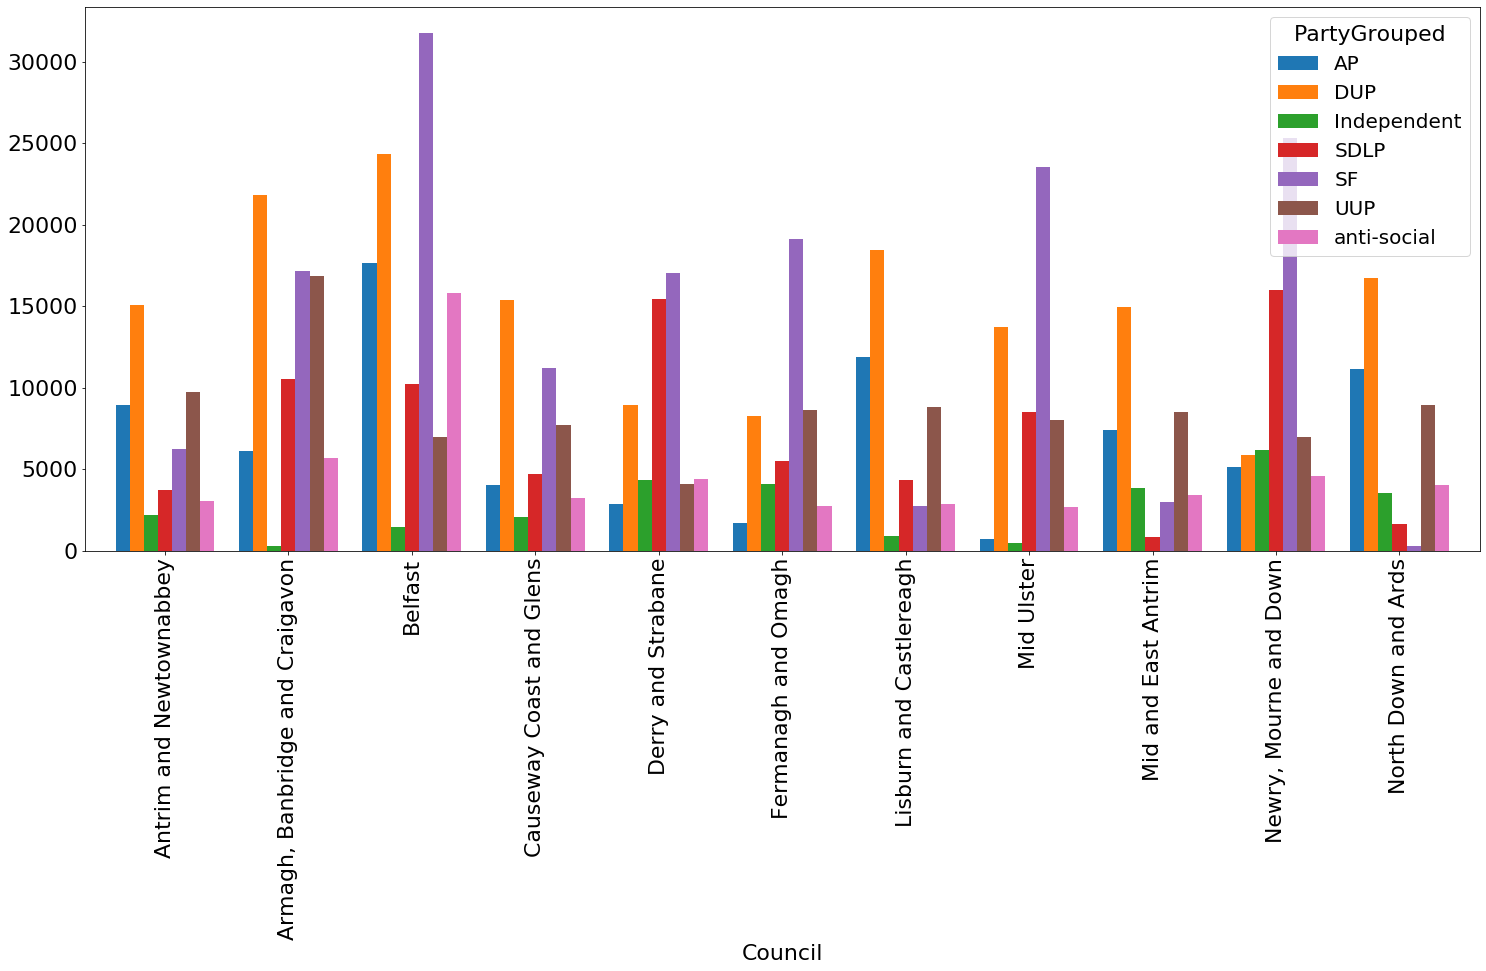

In [84]:
%matplotlib inline

import matplotlib as plt
import numpy as np

plt.rcParams['figure.figsize'] = [25, 10]
plt.rcParams.update({'font.size': 22})


votes_per_party = parties.drop(['Total votes', 'anti2vote'], axis=1)
votes_per_party_small = votes_per_party #.drop(['North Down and Ards', 'Causeway Coast and Glens',
                                        #      'Mid Ulster', 'Fermanagh and Omagh'])


votes_per_party_small[votes_per_party_small==0] = float('nan')
#votes_per_party_small[votes_per_party_small<5000] = float('nan')

# votes_per_party_small.unstack()


votes_per_party_smaller = votes_per_party_small.drop(['Conservatives',
                                                      'Other',
                                                      'Other Socialist',
                                                      'Workers\' Party',
                                                      'UKIP', 'TUV',
                                                      'Aontú', 'GP',
                                                      'Independent Nationalist',
                                                      'Independent Unionist',
                                                      'PBP', 'PUP'], axis=1) 
print(votes_per_party_smaller.head())

votes_per_party_smaller.plot.bar(width=.8, stacked=True)


votes_per_party_smaller.plot.bar(width=.8)
